In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [2]:
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_pd['species'] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier()
iris_tree.fit(iris.data[:,2:], iris.target)

DecisionTreeClassifier()

In [6]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(iris.data[:,2:])
accuracy_score(iris.target, y_pred_tr)

0.9933333333333333

In [34]:
iris.data[:,2:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

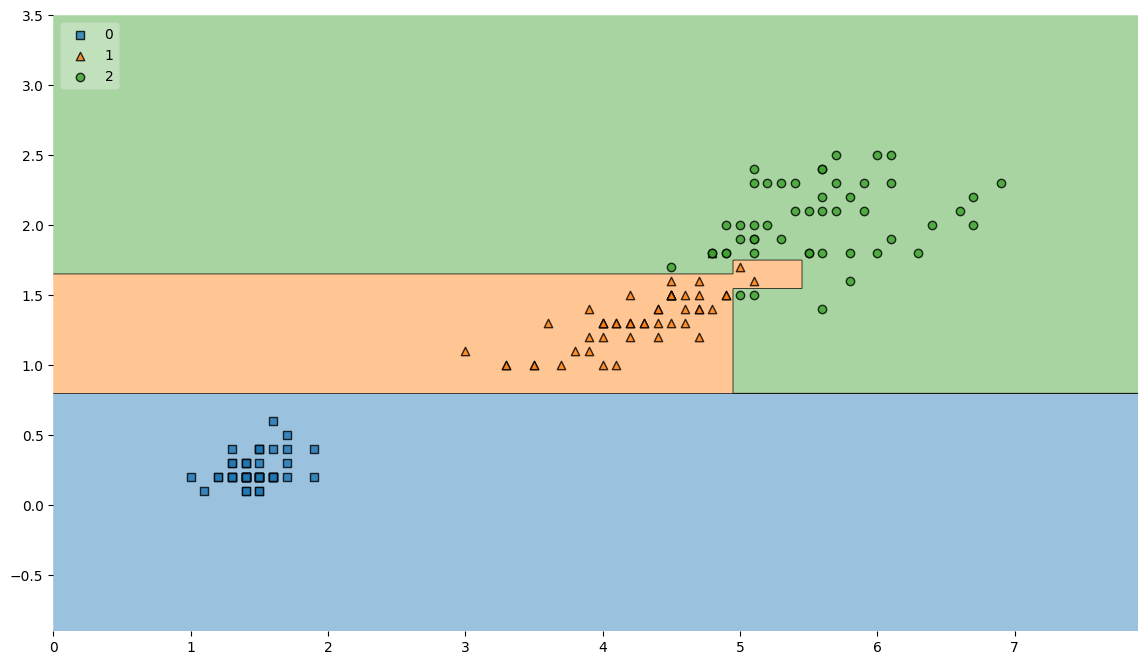

In [7]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14,8))
plot_decision_regions(X=iris.data[:,2:], y=iris.target, clf=iris_tree, legend=2)
plt.show()

In [8]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [9]:
from sklearn.model_selection import train_test_split

features = iris.data[:,2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    random_state=13)

In [10]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13]))

In [11]:
from sklearn.model_selection import train_test_split

features = iris.data[:,2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    stratify=labels,
                                                    random_state=13)

In [12]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

In [13]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [14]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

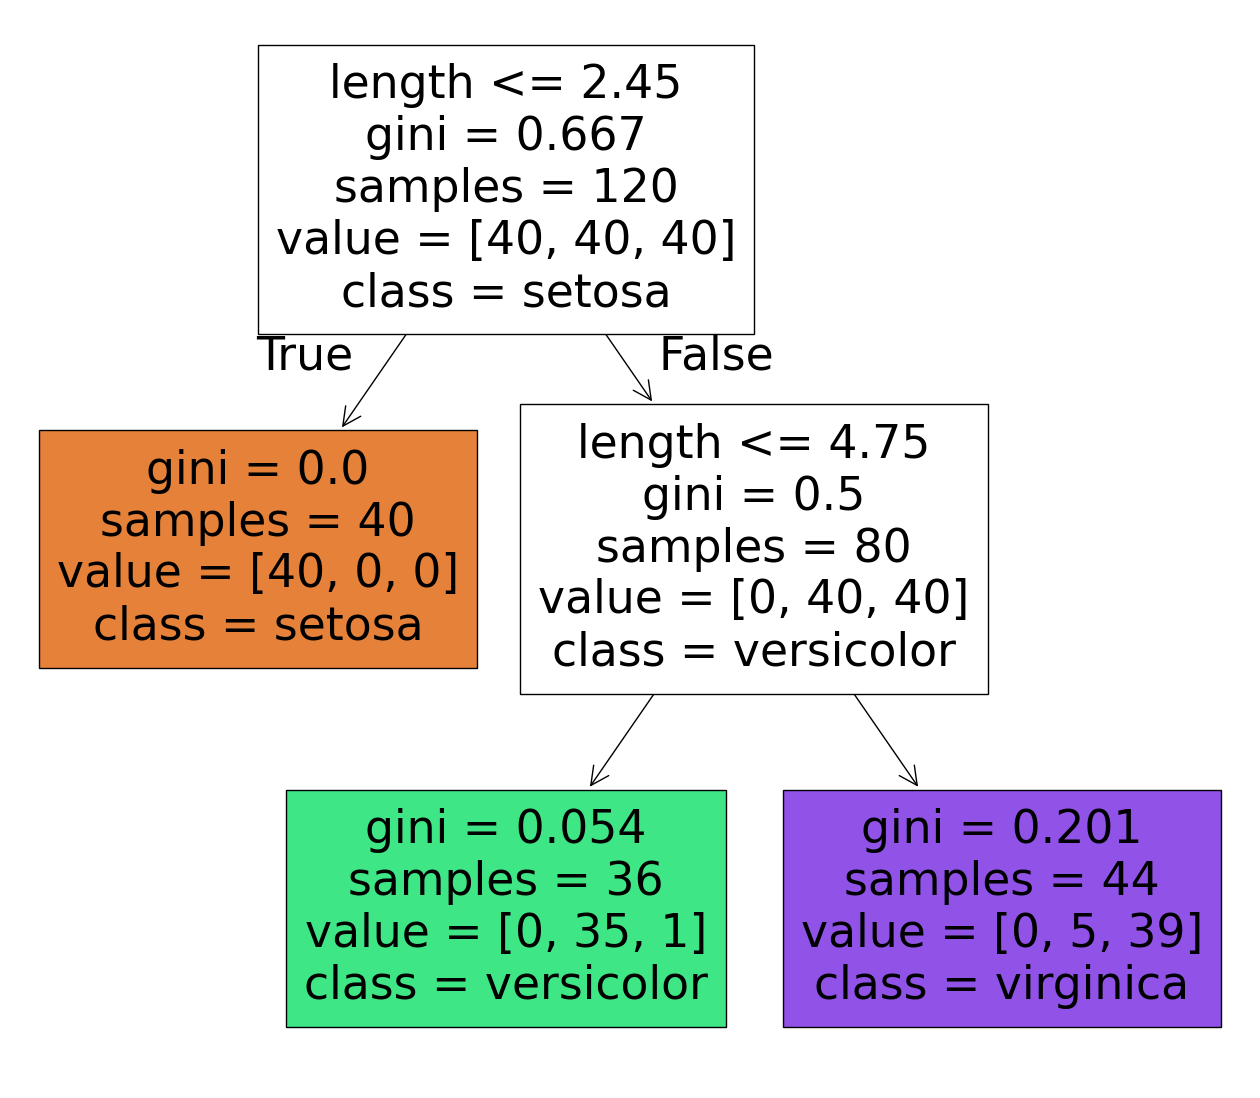

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(16, 14))
_ = tree.plot_tree(iris_tree,
                   feature_names=['length', 'width'],
                   class_names = list(iris.target_names),
                   filled=True)

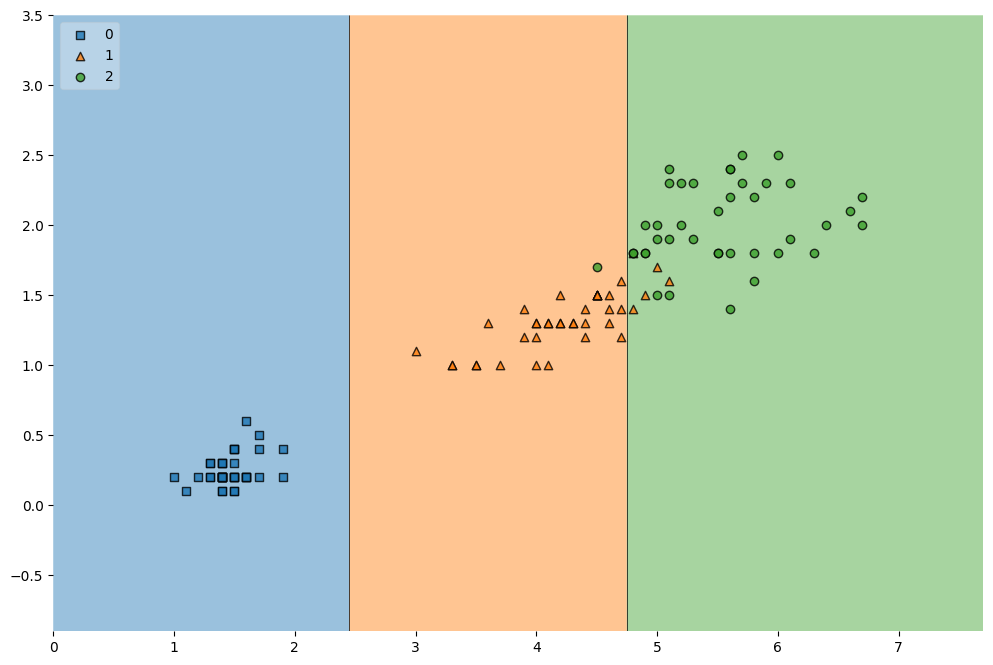

In [16]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show()

In [17]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

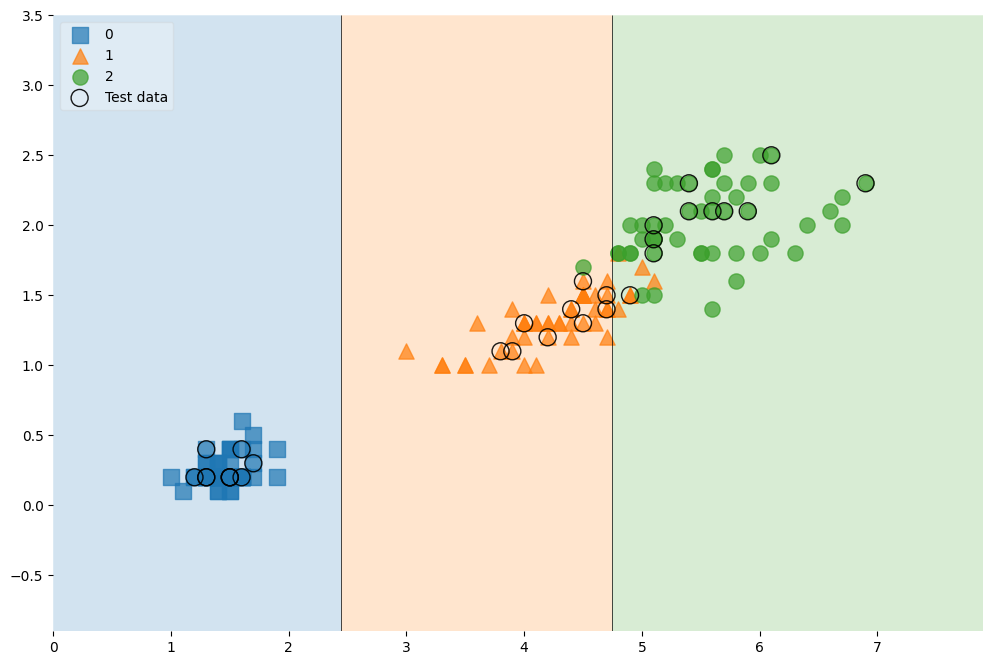

In [18]:
scatter_highlight_kwargs = {'s' : 150, 'label' : 'Test data', 'alpha' : 0.9}
scatter_kwargs = {'s' : 120, 'edgecolor' : None, 'alpha' : 0.7}

plt.figure(figsize=(12,8))
plot_decision_regions(X=features, y=labels,
                      X_highlight=X_test, clf=iris_tree, legend=2,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs={'alpha' : 0.2})
plt.show()

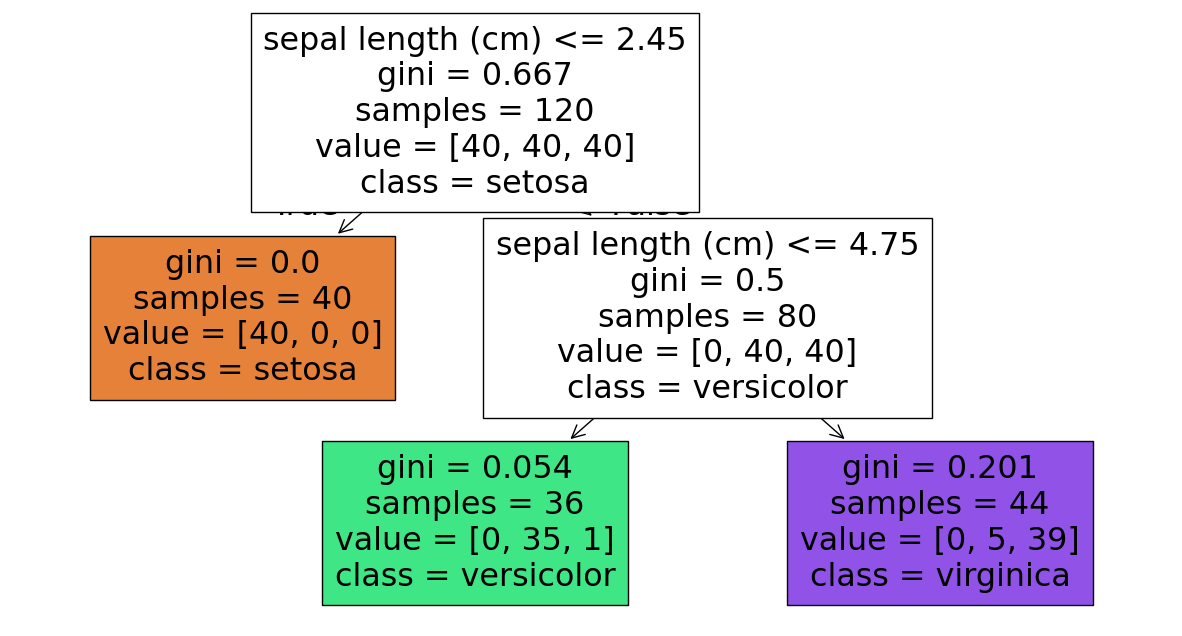

In [19]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(iris_tree,
                   feature_names=list(iris.feature_names),
                   class_names = list(iris.target_names),
                   filled=True)

In [20]:
test_data = [[4.3, 2.], [1.2 , 1.0]]
iris_tree.predict_proba(test_data)

array([[0.        , 0.97222222, 0.02777778],
       [1.        , 0.        , 0.        ]])

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
test_data = [[4.3, 2.], [1.2, 1.0]]
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor', 'setosa'], dtype='<U10')

In [23]:
iris_tree.feature_importances_

array([1., 0.])

In [24]:
iris_clf_model = dict(zip(iris.feature_names, iris_tree.feature_importances_))
iris_clf_model

{'sepal length (cm)': np.float64(1.0), 'sepal width (cm)': np.float64(0.0)}

In [25]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]


In [26]:
pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [27]:
dict(pairs)

{'a': 1, 'b': 2, 'c': 3}